In [1]:
import sys
sys.path.append('..')
import tensorflow as tf
import os
import numpy as np
import argparse
from segmentation.builders import dataset_builder
from segmentation.datasets.deeplab_utils import get_dataset_colormap
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
tf.enable_eager_execution()

/home/ubuntu/anaconda3/envs/zyy_tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/zyy_tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/zyy_tf1.14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/envs/zyy_tf

In [2]:
a = ['cityscapes', 'pascal_voc_seg', 'ade20k', 'camvid']
b = ["/hdd02/zhangyiyang/data/Cityscapes/tfrecords",
    "/hdd02/zhangyiyang/data/VOCdevkit/segmentation_aug_tfrecords",
    "/hdd02/zhangyiyang/data/ADE20K/tfrecord",
    "/hdd02/zhangyiyang/data/CamVid/tfrecords"]
c = ['train', 'train_aug', 'train', 'train']
i = 3
dataset_name = a[i]
dataset_dir = b[i]
train_split = c[i]

def parse_args():
    parser = argparse.ArgumentParser()

    # 数据集类型
    parser.add_argument('--dataset_name', type=str, default=dataset_name)
    parser.add_argument('--dataset_dir', type=str, default=dataset_dir)    
    parser.add_argument('--train_split_name', type=str, default=train_split)
    parser.add_argument('--val_split_name', type=str, default="val")
    
    # 图像预处理参数（包括图像增广）
    parser.add_argument('--train_crop_height', type=int, default=513)
    parser.add_argument('--train_crop_width', type=int, default=513)
    parser.add_argument('--eval_crop_height', type=int, default=513)
    parser.add_argument('--eval_crop_width', type=int, default=513)
    parser.add_argument('--min_resize_value', type=int, default=None)
    parser.add_argument('--max_resize_value', type=int, default=None)
    parser.add_argument('--resize_factor', type=float, default=None) 
    parser.add_argument('--min_scale_factor', type=float, default=.5)
    parser.add_argument('--max_scale_factor', type=float, default=2.) 
    parser.add_argument('--scale_factor_step_size', type=float, default=0.25)
    parser.add_argument('--num_readers', type=int, default=4)

    return parser.parse_args([])
args = parse_args()

In [3]:
dataset_meta = dataset_builder.build_dataset_meta(args.dataset_name)
dataset_configs = dataset_builder.build_dataset_configs(
    dataset_dir=args.dataset_dir, 
    batch_size=10,
    crop_size=(args.train_crop_height, args.train_crop_width),
    min_resize_value=args.min_resize_value,
    max_resize_value=args.max_resize_value,
    resize_factor=args.resize_factor,
    min_scale_factor=args.min_scale_factor,
    max_scale_factor=args.max_scale_factor,
    scale_factor_step_size=args.scale_factor_step_size,
    num_readers=args.num_readers,
    should_shuffle=True,
    is_training=True,
)
train_dataset = dataset_builder.build_dataset(args.dataset_name, args.train_split_name, True, dataset_configs)
dataset_configs = dataset_builder.build_dataset_configs(
    dataset_dir=args.dataset_dir, 
    batch_size=1,
    crop_size=(args.eval_crop_height, args.eval_crop_width),
    should_shuffle=False,
    is_training=False,
)
val_dataset = dataset_builder.build_dataset(args.dataset_name, args.val_split_name, True, dataset_configs)

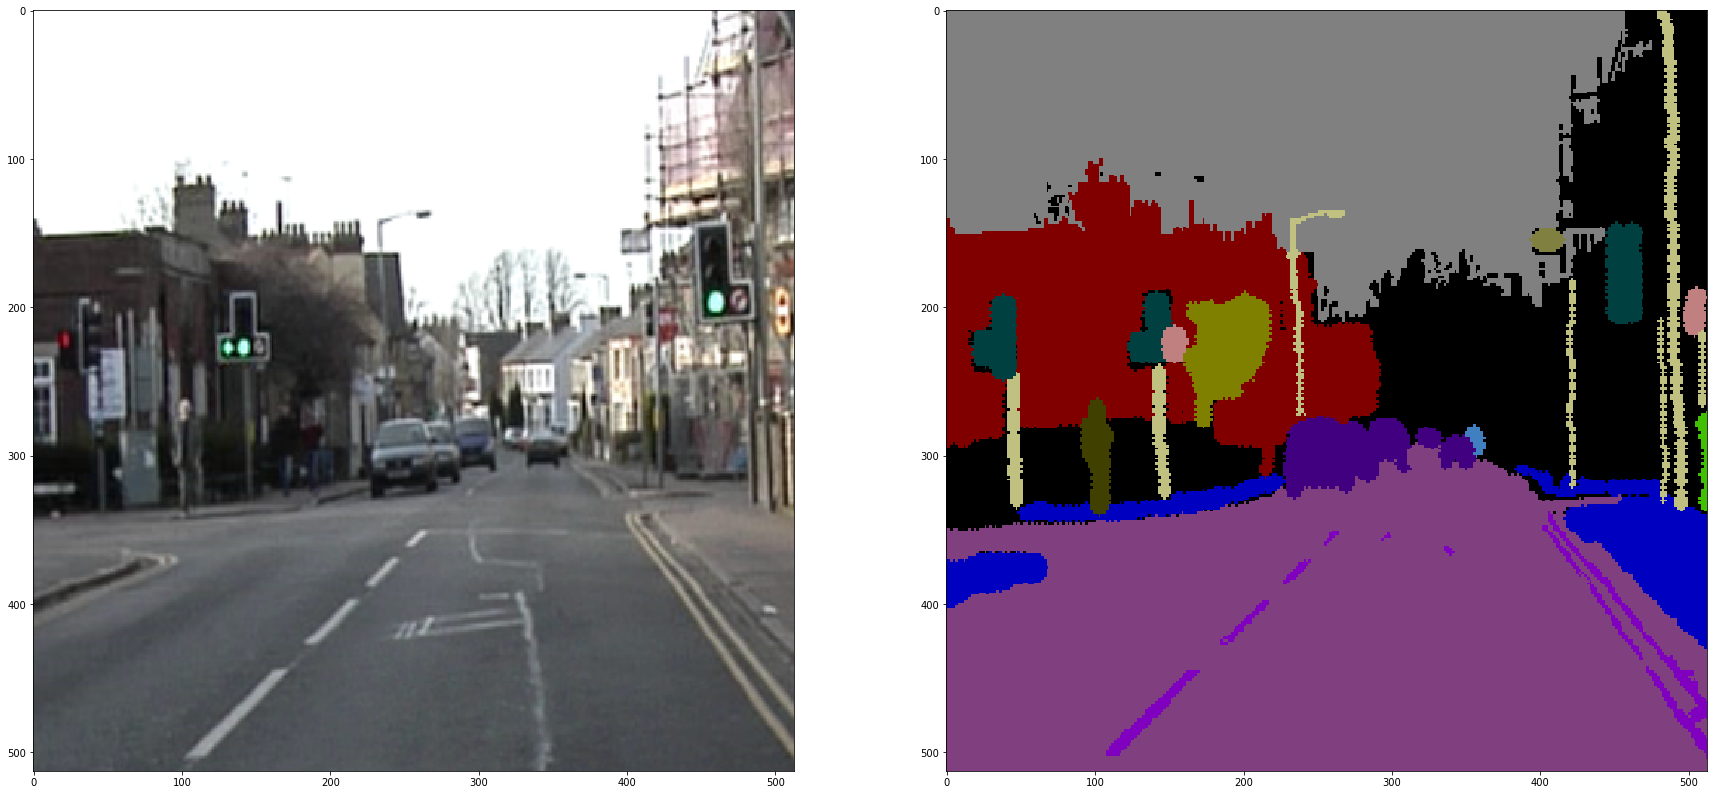

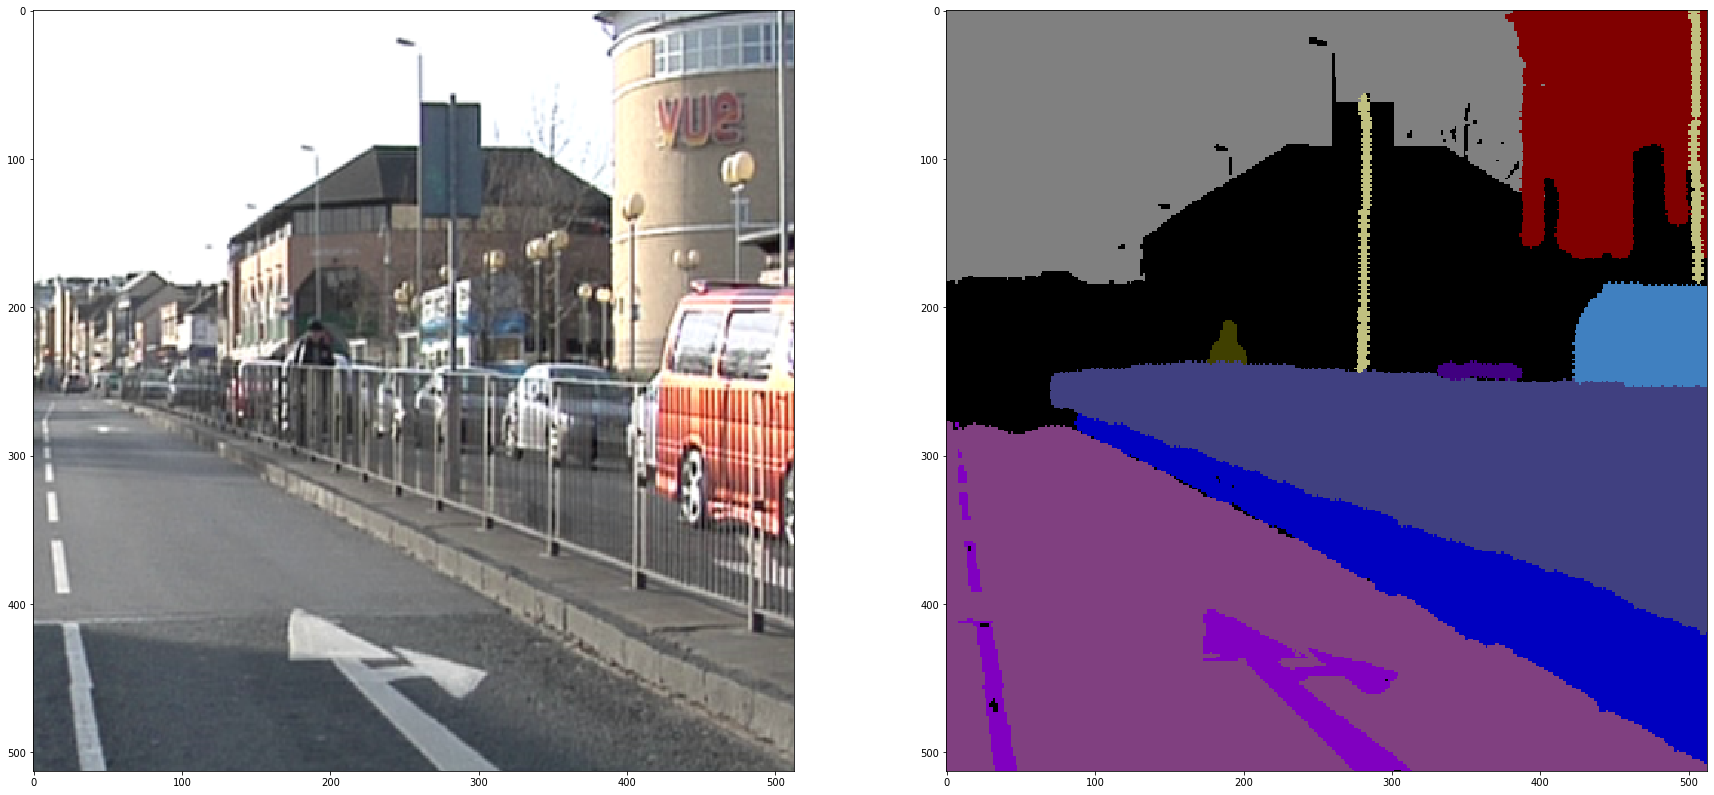

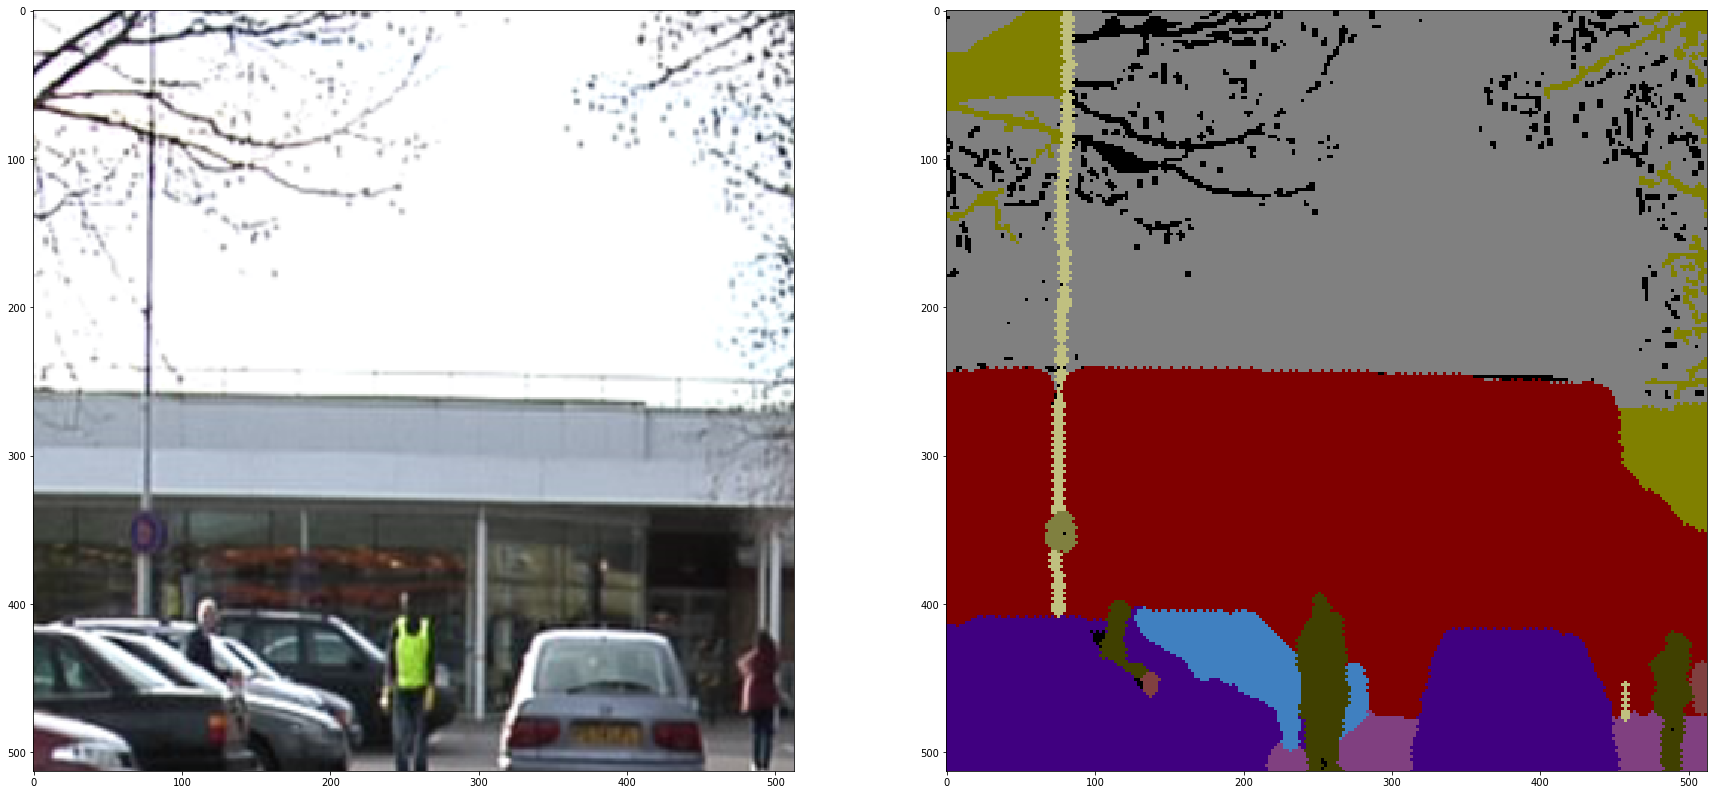

In [4]:
cnt = 0
for d in train_dataset:
    prepocessed_image = d[0].numpy().astype(np.uint8)
    label = d[1]
    color_label = get_dataset_colormap.label_to_color_image(label[0, :, :, 0], dataset_name)
    fig = plt.figure(figsize=(30, 30))
    ax2 = fig.add_subplot(121)
    ax2.imshow(prepocessed_image[0])
    ax3 = fig.add_subplot(122)
    ax3.imshow(color_label)
    
    cnt += 1
    if cnt > 2:
        break